# Symbolic Computation -- Continued

## 1. Simple Exercises

## 2. Complex Functions in Sympy

## 3. Fourier Transform





In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

from sympy import *
from sympy.utilities.lambdify import lambdify  

from sympy import init_printing
init_printing()
# init_printing(use_latex='mathjax')

# from sympy.interactive import printing
# printing.init_printing(use_latex=True)

## Mini Quiz:

##1. Integrate a Gaussian from $-\infty$ to $+\infty$:

## $$y = ae^{-bx^2}$$

## Be sure specify that $b > 0$.  Otherwise the integral blows up.

## 2. Sum over the geometric series

## $$\sum_{0}^{\infty} \frac{1} {2^n}$$

## Be sure to specify that $n$ is an integer.

## 3. Find the normalization factor A of the following function 

## $$f(x) = Asin\left(\frac{2n \pi x} {L}\right)$$

## such that $f(x)$ has a norm of 1 over the interval of $x \in (-L/2, L/2)$.

## Be sure to specify $L > 0$ ($L = 0$ would make an unviable function).



In [50]:
x = symbols('x')
a = symbols('a')
b = symbols('b', positive=True)
y1 = a*exp(-b*x**2)

y1_integrated = integrate(y1, (x, -oo, oo))
print(y1_integrated)

##########

n = symbols('n', integer=True, positive=True)
y2 = 1/2**n
y2_summation = summation(y2, (n, 0, oo))
print(y2_summation)

##########

L = symbols('L', positive=True)
# A = symbols('A')
y3 = sin((2*n*pi*x)/L)

y3_sq = y3**2
y3_norm_sq = integrate(y3_sq, (x, -L/2, L/2))
A = sqrt(y3_norm_sq)**-1
A

sqrt(pi)*a/sqrt(b)
2


sqrt(2)/sqrt(L)

In [51]:
'''Useful for complex Fourier Series and for Fourier Transform'''
print(complex(1j))
print(1j)
print(I.evalf())

1j
1j
1.0*I


In [52]:
# Purely sympy expression
E**(I*pi)

-1

In [53]:
## mixture of sympy and numpy expressions 
E**(1j*pi)

exp(1.0*I*pi)

In [54]:
## mixture of sympy and numpy expressions with evalf()
(E**(1j*pi)).evalf()

-1.0 + 0.e-21*I

In [55]:
## mixture of sympy and numpy expressions
np.e**(1j*pi)

2.71828182845905**(1.0*I*pi)

In [56]:
## mixture of sympy and numpy expressions with evalf()
(np.e**(1j*pi)).evalf()

-1.0 + 2.0e-16*I

In [57]:
(np.e**(1j*pi)).evalf()

-1.0 + 2.0e-16*I

In [58]:
## purely numpy expressions
np.e**(1j*np.pi)

(-1+1.2246467991473532e-16j)

## Conclusion: Generally, DON'T mix numpy and sympy expressions.

## Sympy's plotting function

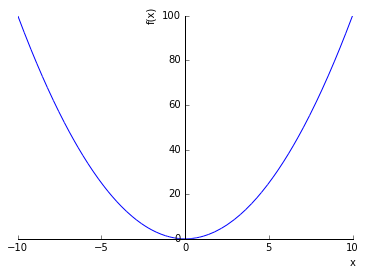

In [59]:
from sympy.abc import x
f = x**2
# note the difference between the tuple that specify the range in which to evalute the function
# and the keyword variable that specifies the range of plotting
plot(f, (x, -10, 10), xlim = (-10, 10))

# This tells you underneath it's still matplotlib
plt.show()

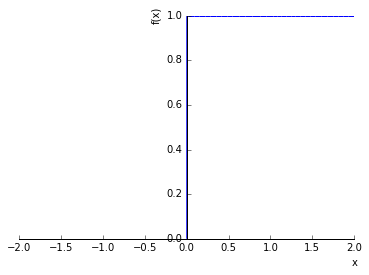

In [60]:
# The Heaviside step function
f = Heaviside(x)
plot(f, (x, -2, 2))
plt.show()

## Mini-breakout: 

- ## Creat a tophat function:

$$f(x) = \begin{cases} 
      0 & x\leq -w/2 \\
      1 & -w/2 < x < w/2 \\
      0 & x \geq w/2
\end{cases}$$

- ## Specify w = 2.

- ## Evaluate and plot the function between $x = -5$ and $5$.

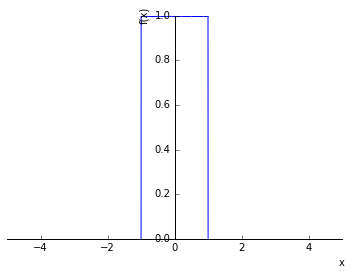

In [61]:
x = symbols('x')
w = symbols('w', positive=True)
# w = 2
tophat = Heaviside(x+w/2.) - Heaviside(x-w/2.)
plot(tophat.subs(w, 2), xlim = (-5, 5))
plt.show()

## Fourier Tranform 

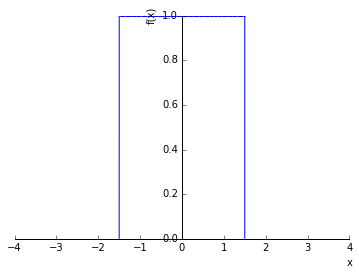

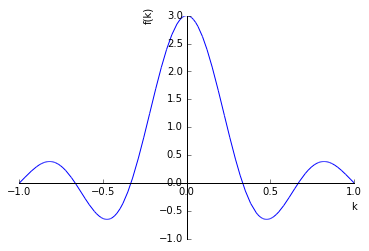

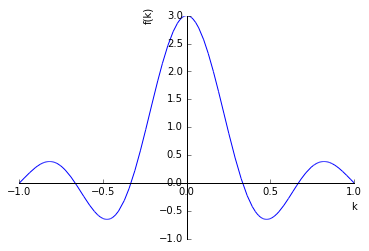

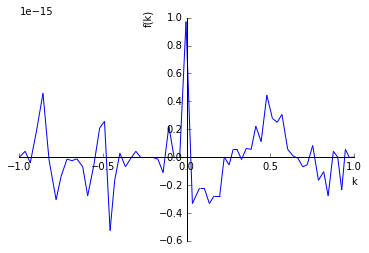

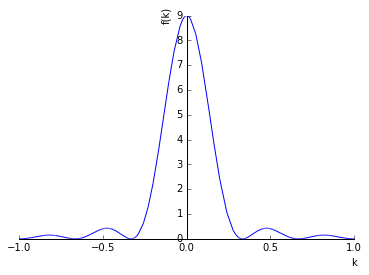

(-Heaviside(-0.5*w + x) + Heaviside(0.5*w + x),
 I*(-0.5*exp(2.0*I*pi*k*w) + 0.5)*exp(-1.0*I*pi*k*w)/(pi*k),
 (-0.5*exp(6.0*I*pi*k) + 0.5)*(-0.5*exp(-6.0*I*pi*conjugate(k)) + 0.5)*exp(-3.0*I*pi*k)*exp(3.0*I*pi*conjugate(k))/(pi**2*k*conjugate(k)))

In [65]:

'''

Note: We specify the width after FT!

Qustion: what do you think is going to happen to the width of the FT if 
I make the width of the tophat wider?

Try it -- do you get what you expected?

Why??

There are two explanations -- first I will offer one from classical physics:

https://en.wikipedia.org/wiki/Fraunhofer_diffraction_(mathematics)#Slit_of_infinite_depth


'''
k = symbols('k')
ft = fourier_transform(tophat, x, k)

wid = 3

xlo = -4
xhi = 4
klo = -1
khi = 1

plot(tophat.subs(w, wid), (x, xlo, xhi))   
# by default the real part is plotted

ft_w = ft.subs(w, wid)
plot(ft_w, (k, klo, khi))   
# if you want to take a look at the real and imaginary parts 
# -- takes a while
plot(re(ft.subs(w, wid)), (k, klo, khi))   
plot(im(ft.subs(w, wid)), (k, klo, khi))   
# So, there is no imaginary part, because the the answer is 
# a purely real function.  If it's Methods, I will ask you to show that
# it's basically the sinc function (closely to the Bessell function):
# http://mathworld.wolfram.com/SincFunction.html

# This is what you really want to plot
# -- because as a physicist, this is what you measure.
ft2 = ft_w*conjugate(ft_w)
plot(ft2, (k, klo, khi))   

tophat, ft, ft2

## ft_w is an analytical function that you can lambdify and apply it to numpy arrays -- this is another way to generate plots.

(-0.5, 1.5)

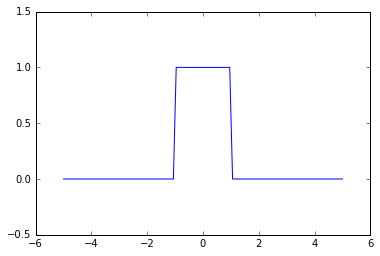

In [63]:
'''
Unfortunately lambdify can't be applied to continuous function.  So to get the numpy version of 
the tophat function itself, we have to try something else.

You know I don't like for loops...well, there is another way

'''
def tophat_single(x_single, a = 2):
    if x_single < -a:
        return 0
    elif x_single > a:
        return 0
    else:
        return 1
    
tophat_np = np.vectorize(tophat_single)

xval = np.linspace(-5, 5, 100)
# yval = tophat(xval)
# Or 
yval = tophat_np(xval, a = 1)
plt.plot(xval, yval)
plt.ylim(-0.5, 1.5)

## Breakout Exercise:

- ## Create a normalized Gaussian function with a mean of 0, in sympy.  Leave $\sigma$ as a parameter (without specifying its value).

- ## Find out its Fourier Transform

- ## Specify the value of $\sigma$

- ## Plot the Gaussian and its Fourier Transform

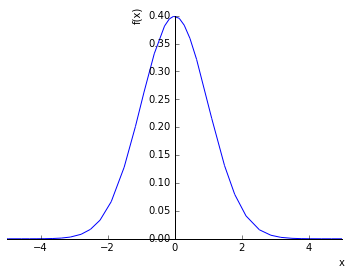

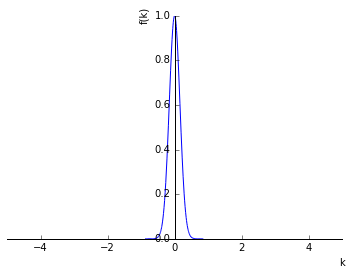

In [64]:
x = symbols('x')
s = symbols('s', positive=True)
# mu = symbols('mu')
k = symbols('k')
sig = 1

a = (1/(s*sqrt(2*pi)))
y = a*(exp(-(1/2.)*(x/s)**2))

y_ft = fourier_transform(y, x, k)
plot(y.subs(s, sig), (x, -10, 10), xlim = (-5, 5))
plot(y_ft.subs(s, sig), (k, -1, 1), xlim = (-5, 5))


## End of Week14-2